In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df = pd.read_csv('data/Train.csv')
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
cloud = [col for col in df.columns if 'L3_CLOUD_' in col and 'angle' not in col]
df_cloud = df[cloud]

NO = [col for col in df.columns if 'L3_NO2_' in col and 'angle' not in col]
df_NO = df[NO]

***
# CLOUD

In [75]:
df_cloud

,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo
0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,0.315403
2,275.903991,98118.935248,0.082247,5.755760,508.977723,95671.383578,0.307463
3,383.692363,97258.462755,0.121555,6.246885,495.380407,96232.486418,0.279637
4,4314.483127,59875.027957,0.037008,4.205691,5314.483207,52561.523079,0.238241
...,...,...,...,...,...,...,...
30552,275.606335,98145.783526,0.001238,5.875377,275.606335,98145.783526,0.243682
30553,438.979426,96883.197984,0.007750,5.068010,604.731099,95208.391485,0.156944
30554,7774.236507,37718.504795,0.026480,10.443789,8774.236499,32475.936039,0.211473
30555,769.134746,93485.065056,0.175418,9.744343,1483.275669,86318.900881,0.221439


In [80]:
df_cloud_ft = df_cloud.copy()
df_cloud_ft = df_cloud_ft.drop(columns=['L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure'], axis=1, inplace=False)

df_cloud_ft = df_cloud_ft.rename(columns={
    'L3_CLOUD_cloud_fraction' : 'cloud_coverage',
    'L3_CLOUD_cloud_optical_depth' : 'cloud_density',
    'L3_CLOUD_surface_albedo' : 'cloud_reflection'  #quality flag
})
df_cloud_ft

,cloud_coverage,cloud_density,cloud_reflection
0,0.000000,NaN,NaN
1,0.059358,5.958538,0.315403
2,0.082247,5.755760,0.307463
3,0.121555,6.246885,0.279637
4,0.037008,4.205691,0.238241
...,...,...,...
30552,0.001238,5.875377,0.243682
30553,0.007750,5.068010,0.156944
30554,0.026480,10.443789,0.211473
30555,0.175418,9.744343,0.221439


In [79]:
len(df_cloud_ft['cloud_coverage']), df_cloud_ft.isna().sum()

(30557,
 cloud_coverage       374
 cloud_density       1522
 cloud_reflection    1522
 dtype: int64)

<Axes: >

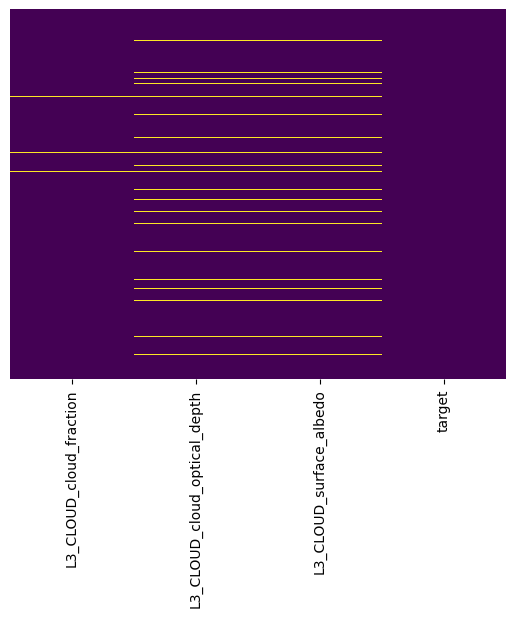

In [ ]:
sns.heatmap(df_cloud_ft.isna(), cbar=False, cmap='viridis', yticklabels=False)

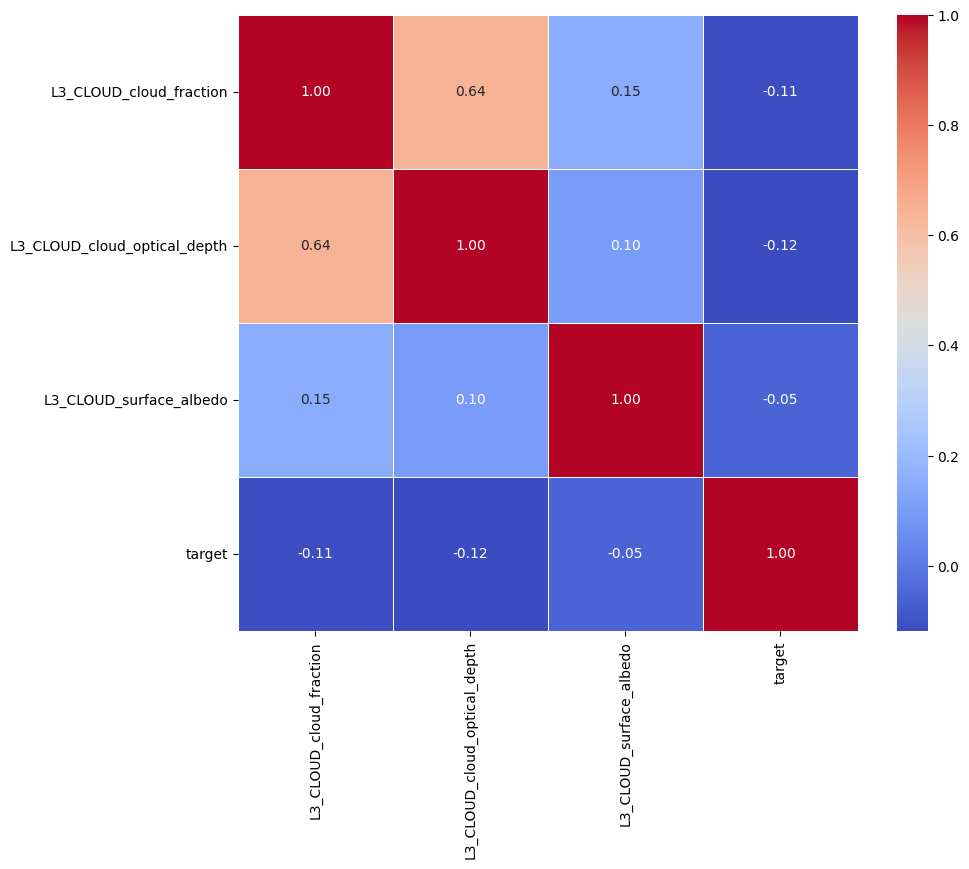

In [ ]:
target = df['target']

df_cloud_ft['target'] = target

df_cloud_ft

corr_fr = df_cloud_ft.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_fr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

***
# NO2

In [ ]:
df_NO

,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density
0,0.000074,0.000156,-1.231330,0.006507,840209.874619,0.000057,6156.074219,0.000017
1,0.000076,0.000197,-1.082553,0.018360,840772.941995,0.000055,6156.074219,0.000021
2,0.000067,0.000170,-1.001242,0.015904,841410.713456,0.000059,7311.869141,0.000007
3,0.000083,0.000175,-0.777019,0.055765,841103.242368,0.000060,11205.388333,0.000023
4,0.000070,0.000142,0.366323,0.028530,840763.055499,0.000062,11205.372845,0.000009
...,...,...,...,...,...,...,...,...
30552,0.000063,0.000165,-1.412609,0.001107,833637.575687,0.000044,22073.788216,0.000019
30553,0.000072,0.000161,-1.449760,0.004726,833603.015554,0.000038,16689.048841,0.000033
30554,0.000068,0.000135,-1.722480,0.026249,833286.230217,0.000043,19245.841946,0.000025
30555,0.000086,0.000148,-2.065102,0.144318,833480.933556,0.000037,16689.689377,0.000038


In [ ]:
df_NO_ft = df_NO.copy()
df_NO_ft = df_NO_ft.drop(columns=['L3_NO2_NO2_slant_column_number_density', 'L3_NO2_cloud_fraction', 'L3_NO2_sensor_altitude', 'L3_NO2_tropopause_pressure'], axis=1, inplace=False)


df_NO_ft = df_NO_ft.rename(columns={
    'L3_NO2_NO2_column_number_density': 'NO_conc_all',
    'L3_NO2_absorbing_aerosol_index': 'aerosol_index',  #another qualitity flag
    'L3_NO2_stratospheric_NO2_column_number_density' : 'NO_conc_highalt',
    'L3_NO2_tropospheric_NO2_column_number_density' : 'NO_conc_lowalt'
})
df_NO_ft

,NO_conc_all,aerosol_index,NO_conc_highalt,NO_conc_lowalt
0,0.000074,-1.231330,0.000057,0.000017
1,0.000076,-1.082553,0.000055,0.000021
2,0.000067,-1.001242,0.000059,0.000007
3,0.000083,-0.777019,0.000060,0.000023
4,0.000070,0.366323,0.000062,0.000009
...,...,...,...,...
30552,0.000063,-1.412609,0.000044,0.000019
30553,0.000072,-1.449760,0.000038,0.000033
30554,0.000068,-1.722480,0.000043,0.000025
30555,0.000086,-2.065102,0.000037,0.000038


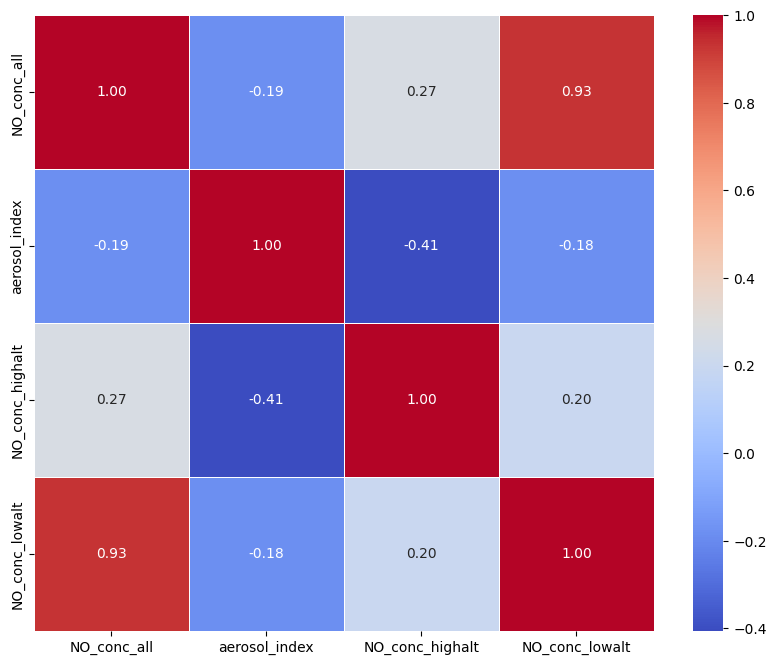

In [ ]:
corr = df_NO_ft.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
len(df_NO_ft['NO_conc_all']), df_NO_ft.isna().sum()

(30557,
 NO_conc_all        2189
 aerosol_index      2189
 NO_conc_highalt    2190
 NO_conc_lowalt     8669
 target                0
 dtype: int64)

<Axes: >

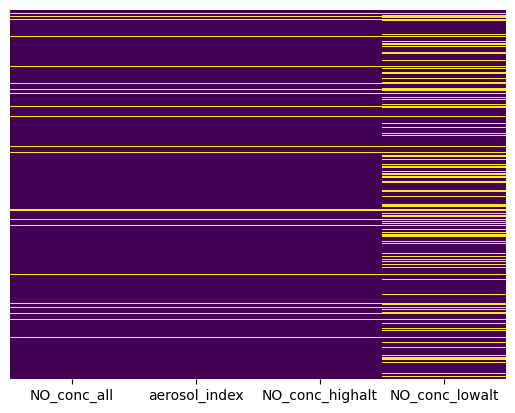

In [ ]:
sns.heatmap(df_NO_ft.isna(), cbar=False, cmap='viridis', yticklabels=False)

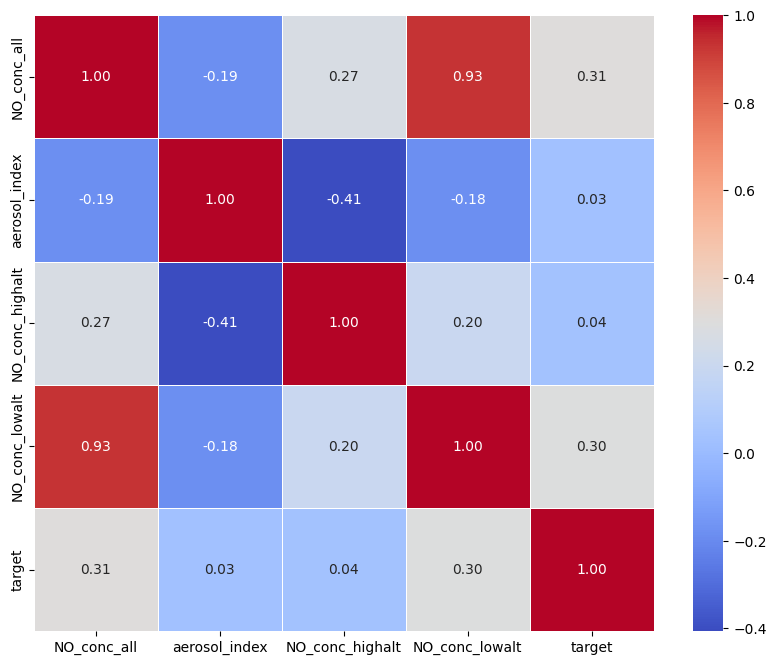

In [ ]:
target = df['target']

df_NO_ft['target'] = target

df_NO_ft

corr_ft = df_NO_ft.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_ft, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

***
# CO

In [ ]:
CO = [col for col in df.columns if 'L3_CO_' in col and 'angle' not in col]
df_CO = df[CO]
df_CO = df_CO.rename(columns={
    'L3_CO_CO_column_number_density': 'CO_conc'
})
df_CO

,CO_conc,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude
0,0.021080,883.332451,267.017184,840138.461052
1,0.022017,1148.985447,61.216687,841116.763051
2,0.020677,1109.347101,134.700335,841319.860448
3,0.021207,1061.570832,474.821444,841036.192900
4,0.037766,1044.247425,926.926310,840710.342206
...,...,...,...,...
30552,0.039941,148.082862,192.388239,833666.850330
30553,0.037872,308.441747,61.379434,833169.251333
30554,0.038539,673.059505,1572.596434,833315.148608
30555,0.038757,957.667555,846.961465,833509.685202
